In [8]:
import string
import seaborn as sns
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [14]:
df = pd.read_csv('metadata\\platemaps\\2023_05_15_Batch1\\platemap\\S-C-7314-04-CMP-001.csv')

df = df.fillna('null')
moa_column = numpy.array(df['MoA'])

moa_plate = moa_column.reshape([16,24])
moas = list(numpy.unique(moa_plate))

moas.sort()
moas.remove('null')
moas = ['null']+moas
for eachmoa in range(len(moas)):
    moa_plate = numpy.where(moa_plate == moas[eachmoa],eachmoa,moa_plate)
moa_plate = moa_plate.astype('uint8')

Rows = list(string.ascii_uppercase)[:16]
plate_df_dict = {}
for eachcol in range(24):
    plate_df_dict[eachcol+1] = moa_plate[:,eachcol]
plate_df_dict['Rows']=Rows

plate_df = pandas.DataFrame(plate_df_dict)
plate_df = plate_df.set_index('Rows')

plate_df = pandas.DataFrame(plate_df_dict)
plate_df = plate_df.set_index('Rows')
moa_with_DMSO = numpy.where(moa_plate == 0,'',moa_plate.astype('str'))


# thanks to https://stackoverflow.com/questions/31051488/combining-two-matplotlib-colormaps
cmap0 = sns.dark_palette("black",input='xkcd',as_cmap=True)
colors0 = cmap0(numpy.linspace(0., 1, 1))
cmap1 = sns.light_palette("cerulean",input='xkcd',as_cmap=True)
colors1 = cmap1(numpy.linspace(0., 1, 255))
colors = numpy.vstack((colors0, colors1))
cmap = mcolors.LinearSegmentedColormap.from_list('cmap', colors)

Text(0.5, 1.0, 'Plate Layout')

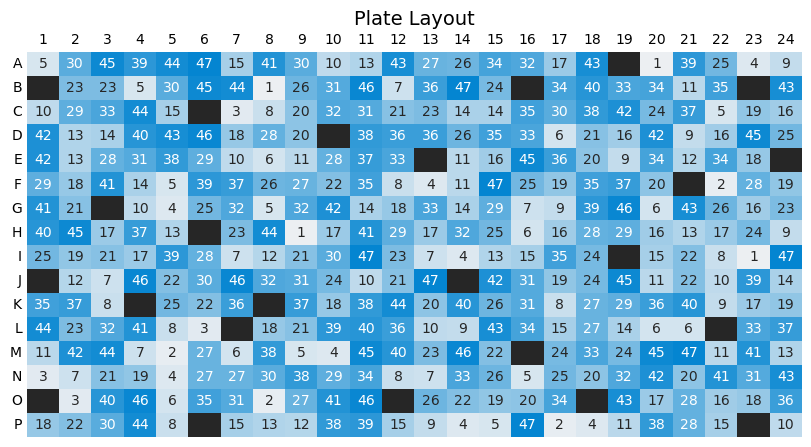

In [33]:
fig, ax = plt.subplots(figsize=(10, 5))
g = sns.heatmap(plate_df,cmap=cmap,cbar=False,ax=ax,annot=moa_with_DMSO,fmt='')
g.set_yticklabels(g.get_yticklabels(), rotation=0, horizontalalignment='right')
g.set_ylabel('')
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
ax.tick_params(length=0)
ax.set_title('Plate Layout', fontsize=14)
